# 基本数据结构

In [68]:
import pandas as pd 
import matplotlib.pyplot as plt 

## 一维数组的创建

In [5]:
s = pd.Series([1,2,3,4,5])
print(s)

0    1
1    2
2    3
3    4
4    5
dtype: int64


## 多维数组的创建

In [7]:
df = pd.DataFrame(np.random.randn(6,4),columns=list('ABCD'))
print(df)

          A         B         C         D
0 -0.498645  1.561995  0.623839  1.004969
1  0.744283 -1.501398  0.234573 -1.487497
2  1.879165  1.011059  1.719315  0.288739
3  1.361562 -1.074936  0.594144  0.676574
4  1.015900  0.022474  1.444456 -0.728055
5  1.111052  0.193623  0.357387  1.853117


## 索引
- 行索引 `df.iloc[0]`
- 列索引
    - `df.A`
    - `df["A"]`

In [9]:
df.iloc[0]

A   -0.498645
B    1.561995
C    0.623839
D    1.004969
Name: 0, dtype: float64

In [13]:
print(df.A)
print("*"*50)
print(df["A"])

0   -0.498645
1    0.744283
2    1.879165
3    1.361562
4    1.015900
5    1.111052
Name: A, dtype: float64
**************************************************
0   -0.498645
1    0.744283
2    1.879165
3    1.361562
4    1.015900
5    1.111052
Name: A, dtype: float64


## 每个DataFrame中的列和行都是Series

In [18]:
print(type(df.iloc[0]))
print("*"*50)
print(type(df.A))

<class 'pandas.core.series.Series'>
**************************************************
<class 'pandas.core.series.Series'>


## 查看列和行的属性值

In [23]:
print(df.columns)
print(df.index)

Index(['A', 'B', 'C', 'D'], dtype='object')
RangeIndex(start=0, stop=6, step=1)


## 查看数据的统计信息

In [26]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.935553,0.035470,0.828952,0.267975
std,0.800331,1.174921,0.607364,1.208054
min,-0.498645,-1.501398,0.234573,-1.487497
25%,0.812187,-0.800583,0.416576,-0.473857
50%,1.063476,0.108049,0.608992,0.482656
75%,1.298934,0.806700,1.239302,0.922871
max,1.879165,1.561995,1.719315,1.853117


## 快速查看文件信息：head/tail

In [30]:
df.head()

,A,B,C,D
0,-0.498645,1.561995,0.623839,1.004969
1,0.744283,-1.501398,0.234573,-1.487497
2,1.879165,1.011059,1.719315,0.288739
3,1.361562,-1.074936,0.594144,0.676574
4,1.015900,0.022474,1.444456,-0.728055


In [31]:
df.tail(3)

,A,B,C,D
3,1.361562,-1.074936,0.594144,0.676574
4,1.015900,0.022474,1.444456,-0.728055
5,1.111052,0.193623,0.357387,1.853117


# 数据排序

排序分为两类：

- 对索引进行排序：`.sort_index()`
- 依据值的大小排序：`.sort_value()`

In [32]:
df.sort_index(axis=1,ascending=False)

,D,C,B,A
0,1.004969,0.623839,1.561995,-0.498645
1,-1.487497,0.234573,-1.501398,0.744283
2,0.288739,1.719315,1.011059,1.879165
3,0.676574,0.594144,-1.074936,1.361562
4,-0.728055,1.444456,0.022474,1.015900
5,1.853117,0.357387,0.193623,1.111052


In [34]:
df.sort_index(axis=0,ascending=False)

,A,B,C,D
5,1.111052,0.193623,0.357387,1.853117
4,1.015900,0.022474,1.444456,-0.728055
3,1.361562,-1.074936,0.594144,0.676574
2,1.879165,1.011059,1.719315,0.288739
1,0.744283,-1.501398,0.234573,-1.487497
0,-0.498645,1.561995,0.623839,1.004969


补充：sort_values的语法：

- `df.sort_values(by='行号',axis=1)`
- `df.sort_values(by=‘列号’,axis=0)`

若是想按照某列的值对数据进行排序，则`行`需要排序，则axis需要设置为0

In [35]:
df.sort_values(by='B')

,A,B,C,D
1,0.744283,-1.501398,0.234573,-1.487497
3,1.361562,-1.074936,0.594144,0.676574
4,1.015900,0.022474,1.444456,-0.728055
5,1.111052,0.193623,0.357387,1.853117
2,1.879165,1.011059,1.719315,0.288739
0,-0.498645,1.561995,0.623839,1.004969


In [40]:
df.sort_values(by=1,axis=1)

,B,D,C,A
0,1.561995,1.004969,0.623839,-0.498645
1,-1.501398,-1.487497,0.234573,0.744283
2,1.011059,0.288739,1.719315,1.879165
3,-1.074936,0.676574,0.594144,1.361562
4,0.022474,-0.728055,1.444456,1.015900
5,0.193623,1.853117,0.357387,1.111052


# 索引

- df.loc[] 根据`标签的名称`去索引
- df.iloc[] 根据`标签的索引值`去索引

In [43]:
df.loc[3,'A']

1.361561729021052

In [53]:
df.iloc[3,0]

1.361561729021052

- 选中一列，根据布尔值【实际上就是if语句】去排序行

In [56]:
df[df.C>1]

,A,B,C,D
2,1.879165,1.011059,1.719315,0.288739
4,1.015900,0.022474,1.444456,-0.728055


- 增加一列

In [58]:
df["animal"] = ["cat","dog","cat","dog","cat","cat"]

In [59]:
print(df)

          A         B         C         D animal
0 -0.498645  1.561995  0.623839  1.004969    cat
1  0.744283 -1.501398  0.234573 -1.487497    dog
2  1.879165  1.011059  1.719315  0.288739    cat
3  1.361562 -1.074936  0.594144  0.676574    dog
4  1.015900  0.022474  1.444456 -0.728055    cat
5  1.111052  0.193623  0.357387  1.853117    cat


- 根据新添加的“animal”标签去统计对应的数据

In [62]:
df.groupby("animal").sum()

,A,B,C,D
animal,,,,
cat,3.507472,2.789151,4.144997,2.418770
dog,2.105844,-2.576334,0.828718,-0.810923


In [65]:
df.groupby("animal").mean()

,A,B,C,D
animal,,,,
cat,0.876868,0.697288,1.036249,0.604692
dog,1.052922,-1.288167,0.414359,-0.405461


# 数据可视化

Pandas中使用到的工具，本质就是调用的Matplotlib工具库，它只是做了一个封装。

<Figure size 1440x864 with 0 Axes>

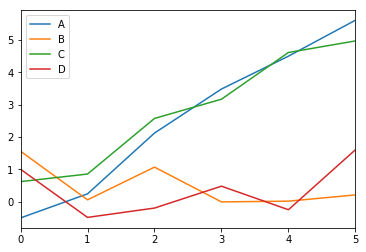

In [69]:
plt.figure(figsize=(10,6),dpi=144)
cs = df.cumsum()
cs.plot()

# 数据的存取

- 存 ： df.to_csv(index = False)
- 取 ： df.read_csv(".csv")

In [74]:
df2 = pd.DataFrame({'name':['Raphael','Donatello'],
                   'mask': ['red', 'purple'],
                   'weapon': ['sai', 'bo staff']})
df2.to_csv('Result.csv',index=False)

In [75]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


In [82]:
import pandas as pd 
df3 = pd.read_csv("Result.csv")
df3

,name,mask,weapon
0,Raphael,red,sai
1,Donatello,purple,bo staff
